Importing modules

In [28]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as pyplot
import pickle
from sklearn import linear_model
from sklearn.utils import shuffle
from matplotlib import style

Reading the data which is in csv format and is separated by commas, and then showing a short snippet.

The dataset is from this website: https://www.kaggle.com/datasets/dev0914sharma/car-purchasing-model
It includes customer names, email addresses, and region (ununsed in this algorithm).
The columns I will be using in this algorithm will be Gender, Age, Annual Salary, Credit Card Debt, and Net Worth.

Currency is USD

In [29]:
data = pd.read_csv("Car_Purchasing_Data.csv", sep=",")
print(data.head())

     Customer Name                                    Customer e-mail Country  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu     USA   
1    Harlan Barnes                                eu.dolor@diam.co.uk     USA   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...     USA   
3  Jade Cunningham                            malesuada@dignissim.com     USA   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net     USA   

   Gender  Age  Annual Salary  Credit Card Debt    Net Worth  \
0       0   42    62812.09301      11609.380910  238961.2505   
1       0   41    66646.89292       9572.957136  530973.9078   
2       1   43    53798.55112      11160.355060  638467.1773   
3       1   58    79370.03798      14426.164850  548599.0524   
4       1   57    59729.15130       5358.712177  560304.0671   

   Car Purchase Amount  
0          35321.45877  
1          45115.52566  
2          42925.70921  
3          67422.36313  
4  

Specifying which columnns to use. In this case I excluded anything with string values because the current linear regression algorithm doesn't have anything to convert the string values into integers, which is what I can do with KNN

In [30]:
data = data[["Gender", "Age", "Annual Salary", "Credit Card Debt", "Net Worth", "Car Purchase Amount"]]
print(data.head())

   Gender  Age  Annual Salary  Credit Card Debt    Net Worth  \
0       0   42    62812.09301      11609.380910  238961.2505   
1       0   41    66646.89292       9572.957136  530973.9078   
2       1   43    53798.55112      11160.355060  638467.1773   
3       1   58    79370.03798      14426.164850  548599.0524   
4       1   57    59729.15130       5358.712177  560304.0671   

   Car Purchase Amount  
0          35321.45877  
1          45115.52566  
2          42925.70921  
3          67422.36313  
4          55915.46248  


"Charges" is the label (the target variable) and it is the one I am trying to get the algorithm to predict

In [31]:
predict = "Car Purchase Amount"

x = np.array(data.drop(predict, axis=1))
y = np.array(data[predict])

Splitting the data into training and testing then creating models. Instead of running this block manually each time, there is a loop that runs the training and testing 4000 times and saves the model that is the most accurate. I then commented it out after training a model.

In [32]:
'''best = 0
for _ in range(2000):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)
    linear = linear_model.LinearRegression()

    # Define the line of best fit
    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print(acc)

    if acc > best:
        best = acc
        with open("cars.pickle", "wb") as f:
            pickle.dump(linear, f)'''

0.9995686852761692
0.9994439590126412
0.9990208191572836
0.9994800924917933
0.9995682833562357
0.9993212199677973
0.9993558057720803
0.9996247098202824
0.9994119371149734
0.9994986367330443
0.9995372188997924
0.9995580578140015
0.9994603056511258
0.9995254264228207
0.9995346755711868
0.9993524479250661
0.9993385239430014
0.9994206178067501
0.9994572486451497
0.999234611375123
0.9993388992098495
0.9995442994297061
0.9996319395512709
0.999605383216557
0.9996275528285228
0.9994161441416063
0.9993829994302106
0.9996436910281654
0.9996221754110458
0.9994391447014797
0.9993496015701618
0.9996306336698123
0.9992871448801981
0.9995525347126291
0.9989174664930068
0.9992930105911175
0.999351629102163
0.9992189243386456
0.9993514399899034
0.9994700069410446
0.999516251881341
0.9994342096238795
0.9994732799376652
0.9994771657731247
0.9995006395067191
0.9996290224833597
0.9995332330941094
0.9994895358392483
0.9994472647207219
0.9996393849021311
0.9995633929959427
0.999554824818693
0.999550131426084

Showing the accuracy of the saved model

In [33]:
print('best')

best


Loading the pickle file

In [34]:
pickle_in = open("cars.pickle", "rb")
linear = pickle.load(pickle_in)

Printing the coefficients

In [35]:
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Coefficient: 
 [2.58089996e+01 8.40515337e+02 5.62397447e-01 5.16922692e-03
 2.89591764e-02]
Intercept: 
 -42146.199605881106


In [36]:
predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x]) 

47840.20354632191 [0.00000000e+00 6.10000000e+01 3.87791840e+04 1.27588958e+04
 5.81497887e+05] 47935.9394
33680.28163351139 [0.00000000e+00 4.80000000e+01 5.69448708e+04 1.64490665e+04
 1.16407529e+05] 33766.6413
64205.361675612075 [1.00000000e+00 5.40000000e+01 6.88887780e+04 1.06116069e+04
 7.64531320e+05] 64147.28888
39270.670434147294 [1.00000000e+00 3.70000000e+01 6.94537166e+04 9.56583087e+03
 3.86128133e+05] 39002.0771
55477.694354402964 [1.00000000e+00 4.50000000e+01 8.00158311e+04 9.06461862e+03
 5.08555159e+05] 55420.56668
44186.011950470696 [0.00000000e+00 5.50000000e+01 5.94862707e+04 6.51533678e+03
 2.28434051e+05] 44424.07681
33460.10607565391 [0.00000000e+00 4.30000000e+01 5.14190164e+04 9.02606154e+03
 3.62564346e+05] 33131.52734
32203.19501617855 [0.00000000e+00 4.30000000e+01 5.00511404e+04 8.93235341e+02
 3.47177837e+05] 32553.53423
56756.851736148485 [0.00000000e+00 4.30000000e+01 7.48345712e+04 9.36602756e+03
 7.12233824e+05] 56764.44728
53242.01298409377 [0.00000

Plotting the data with pyplot. The charts show a strong correlation between the independent and dependent (predicted car purchase amount) variables

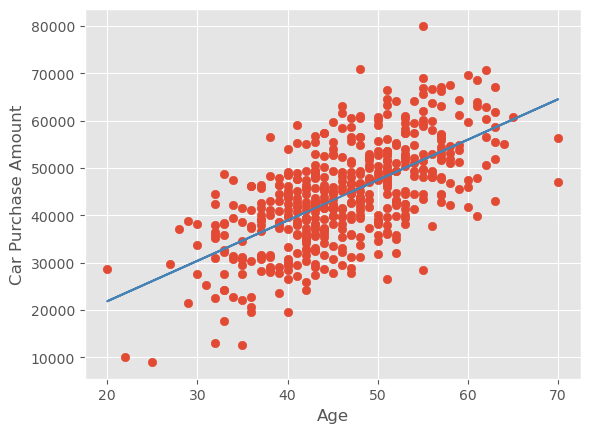

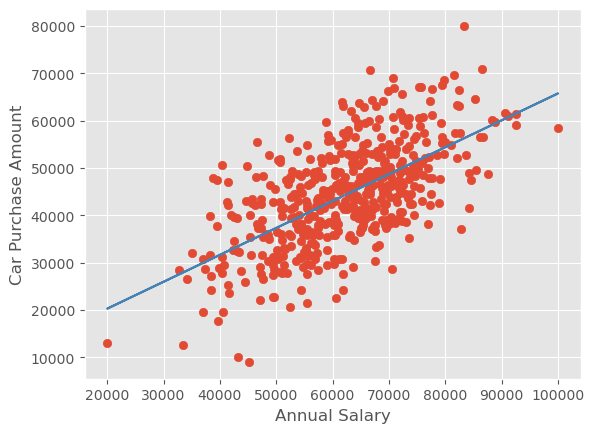

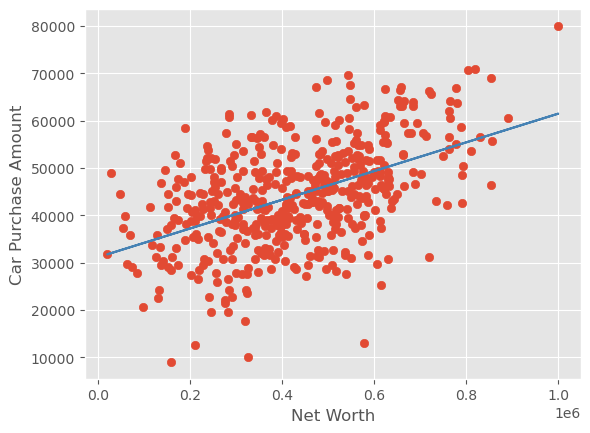

In [42]:
style.use("ggplot")

# Scatter plot for age vs car purchase amount with line of best fit
x = "Age"
a, b = np.polyfit(data[x], data["Car Purchase Amount"], 1)
pyplot.scatter(data[x], data["Car Purchase Amount"])
pyplot.xlabel(x)
pyplot.ylabel("Car Purchase Amount")
pyplot.plot(data[x], a*data[x]+b, color='steelblue')
pyplot.show()

# Scatter plot for age vs car purchase amount with line of best fit
x = "Annual Salary"
a, b = np.polyfit(data[x], data["Car Purchase Amount"], 1)
pyplot.scatter(data[x], data["Car Purchase Amount"])
pyplot.xlabel(x)
pyplot.ylabel("Car Purchase Amount")
pyplot.plot(data[x], a*data[x]+b, color='steelblue')
pyplot.show()

# Scatter plot for age vs car purchase amount with line of best fit
x = "Net Worth"
a, b = np.polyfit(data[x], data["Car Purchase Amount"], 1)
pyplot.scatter(data[x], data["Car Purchase Amount"])
pyplot.xlabel(x)
pyplot.ylabel("Car Purchase Amount")
pyplot.plot(data[x], a*data[x]+b, color='steelblue')
pyplot.show()